In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.tri import Triangulation
def triangulation_for_triheatmap(M, N):
    xv, yv = np.meshgrid(np.arange(-0.5, M), np.arange(-0.5, N))  # vertices of the little squares
    xc, yc = np.meshgrid(np.arange(0, M), np.arange(0, N))  # centers of the little squares
    x = np.concatenate([xv.ravel(), xc.ravel()])
    y = np.concatenate([yv.ravel(), yc.ravel()])
    cstart = (M + 1) * (N + 1)  # indices of the centers

    trianglesN = [(i + j * (M + 1), i + 1 + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesE = [(i + 1 + j * (M + 1), i + 1 + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesS = [(i + 1 + (j + 1) * (M + 1), i + (j + 1) * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    trianglesW = [(i + (j + 1) * (M + 1), i + j * (M + 1), cstart + i + j * M)
                  for j in range(N) for i in range(M)]
    return [Triangulation(x, y, triangles) for triangles in [trianglesN, trianglesE, trianglesS, trianglesW]]

In [3]:
#### data
# Load the arrays from the npz file
data = np.load('.\Interresult\heatmap_wind_winter.npz')

m_joint = data ['m_joint']
m_disjoint = data ['m_disjoint']
m_single = data ['m_single']
m_joint_noArb = data ['m_joint_noArb']
valueWind = data ['valueWind']
valueWind_noArb = data ['valueWind_noArb']
value_arbitrager = data ['value_arbitrager']

In [4]:
storage_choice = np.arange(0.2, 2, 0.2)*1000
storage_choice=storage_choice.astype(int)
RES_choice = np.arange(0.2, 2, 0.2)*1000
RES_choice =RES_choice.astype(int)
value_df = pd.DataFrame({'Storage Capacity (MW)': np.repeat(storage_choice, len(RES_choice)),
                   'Wind Capacity (MW)': np.tile(storage_choice, len(RES_choice))})
valueWind = np.round(valueWind*1000, decimals=2)
valueWind_noArb = np.round(valueWind_noArb*1000, decimals=1)
value_arbitrager = np.round(value_arbitrager*1000, decimals=1)
value_df['RES'] = valueWind.flatten()
value_df['arbitrager'] = value_arbitrager.flatten()
value_df['Gap (RES-arbitrager)'] = (valueWind-value_arbitrager).flatten()
value_df['Gap (RES_noArb-arbitrager)'] = (valueWind_noArb-value_arbitrager).flatten()
value_df.head()

,Storage Capacity (MW),Wind Capacity (MW),RES,arbitrager,Gap (RES-arbitrager),Gap (RES_noArb-arbitrager)
0,200,200,336.62,336.7,-0.08,-13.0
1,200,400,336.54,336.6,-0.06,-0.1
2,200,600,336.45,336.6,-0.15,-0.2
3,200,800,336.36,336.5,-0.14,-0.1
4,200,1000,336.27,336.5,-0.23,-0.2


C:\Users\GU Nan\AppData\Local\Temp\ipykernel_10392\1281229253.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,1)


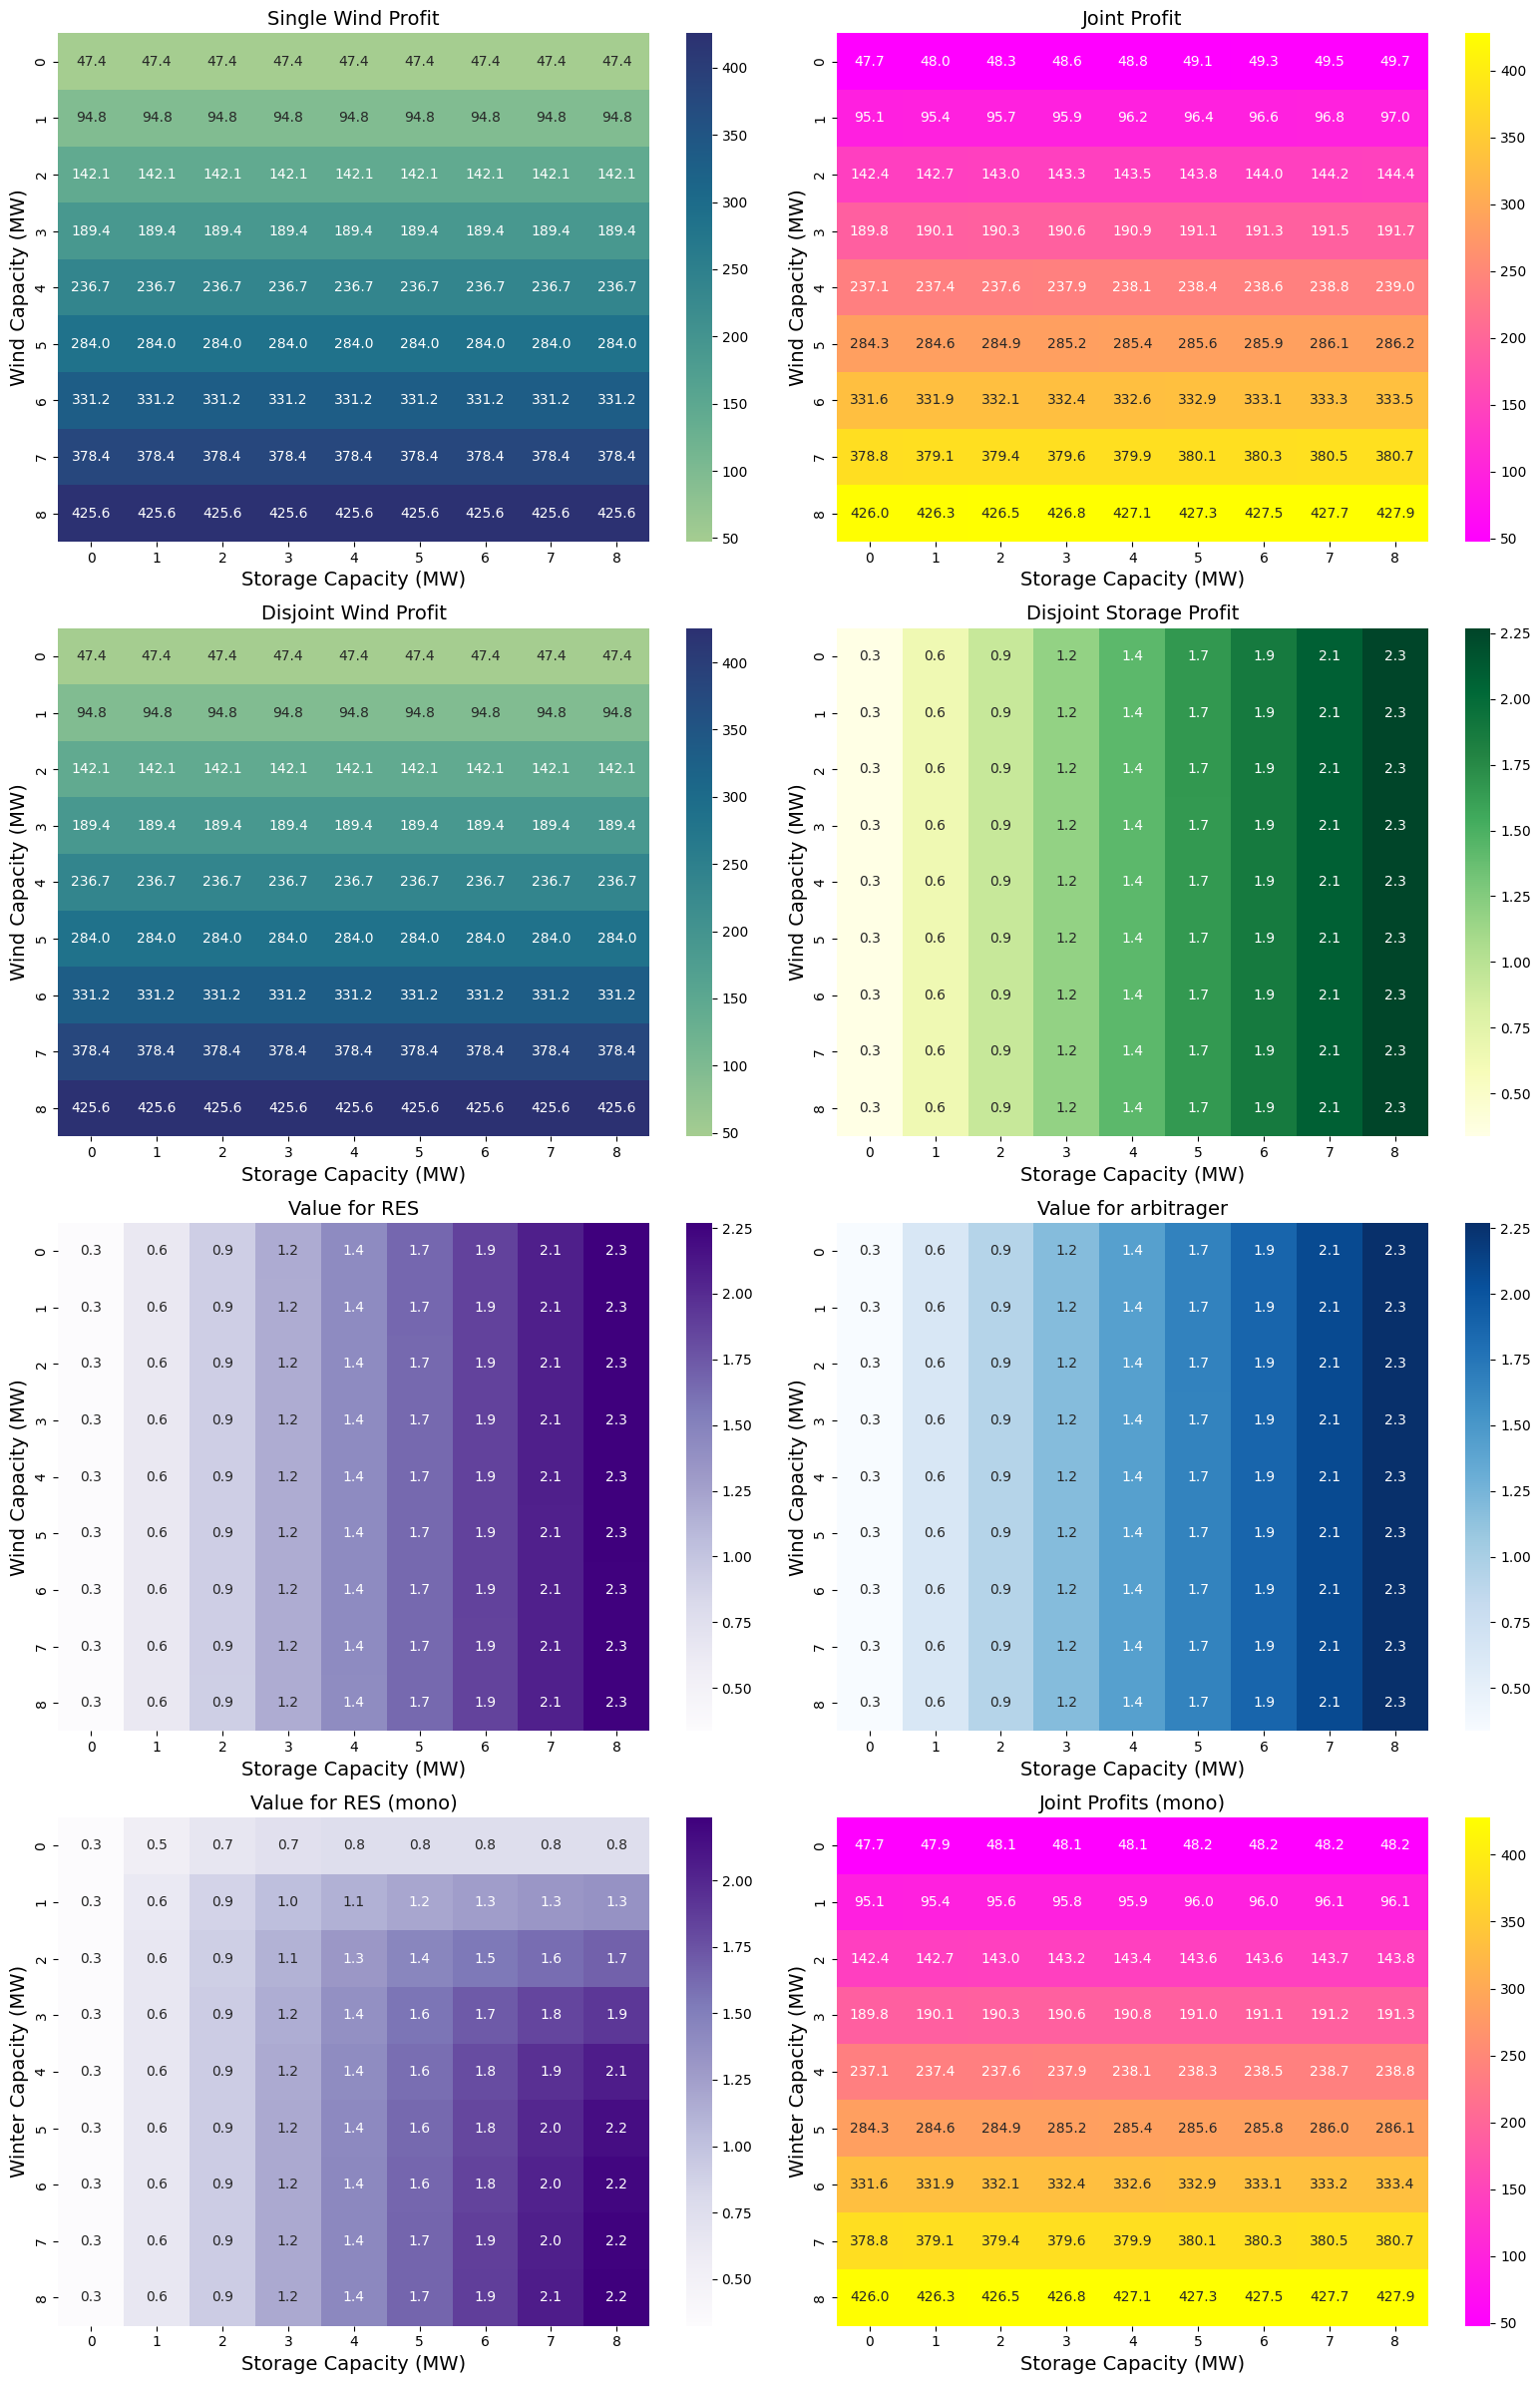

In [5]:
# RES_heatmap = value_df.pivot("Storage Capacity (MW)", "Wind Capacity (MW)", "RES")
plt.subplots(figsize=(16, 24))
plt.subplot(4,2,1)
sns.heatmap(np.round(m_single.T, decimals=1), cmap="crest",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.title('Single Wind Profit', fontsize = 14)
plt.subplot(4,2,2)
sns.heatmap(np.round(m_joint.T, decimals=1), cmap="spring",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.title('Joint Profit', fontsize = 14)
plt.subplot(4,2,3)
sns.heatmap(np.round(m_disjoint.T-value_arbitrager.T/1000, decimals=1), cmap="crest",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.title('Disjoint Wind Profit', fontsize = 14)
plt.subplot(4,2,4)
sns.heatmap(value_arbitrager.T/1000, cmap="YlGn",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.title('Disjoint Storage Profit', fontsize = 14)
plt.subplot(4,2,5)
sns.heatmap(m_joint.T-m_single.T, cmap="Purples",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.title('Value for RES', fontsize = 14)
plt.subplot(4,2,6)
sns.heatmap(value_arbitrager.T/1000, cmap="Blues",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.title('Value for arbitrager', fontsize = 14)
plt.subplot(4,2,7)
sns.heatmap(m_joint_noArb.T-m_single.T, cmap="Purples",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Winter Capacity (MW)', fontsize = 14)
plt.title('Value for RES (mono)', fontsize = 14)
plt.subplot(4,2,8)
sns.heatmap(m_joint_noArb.T, cmap="spring",annot = True, fmt=".1f")
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Winter Capacity (MW)', fontsize = 14)
plt.title('Joint Profits (mono)', fontsize = 14)
plt.tight_layout()
plt.savefig(".\pics\ALL_heatmap_wind_winter.pdf")

In [6]:
df_piv = value_df.pivot_table(index='Wind Capacity (MW)', columns='Storage Capacity (MW)')
M = len(df_piv.columns) // 4
N = len(df_piv)
values = [df_piv[dir] for dir in
          ['RES', 'arbitrager', 'Gap (RES-arbitrager)', 'Gap (RES_noArb-arbitrager)']]  
triangul = triangulation_for_triheatmap(M, N)
cmaps = ['Purples', 'Blues', 'summer', 'Wistia']


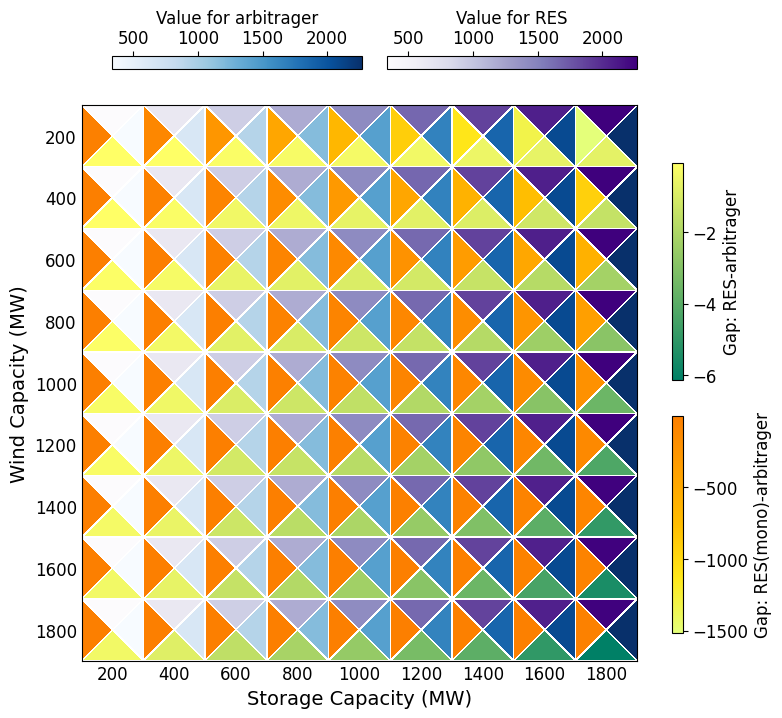

In [7]:
norms = [plt.Normalize(np.min(valueWind), np.max(valueWind))] +[plt.Normalize(np.min(value_arbitrager), np.max(value_arbitrager))] + [plt.Normalize(np.min(valueWind-value_arbitrager), np.max(valueWind-value_arbitrager))]+ [plt.Normalize(np.min(valueWind_noArb-value_arbitrager), np.max(valueWind_noArb-value_arbitrager))]

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(8, 8))
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

ax.tick_params(length=0)
ax.set_xticks(range(M))
ax.set_xticklabels(df_piv['RES'].columns)
ax.set_yticks(range(N))
ax.set_yticklabels(df_piv.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells

# axins = inset_axes(plt.gca(),width="100%",  height="5%",loc='lower right', borderpad=2.3)

cbar_3 = plt.colorbar(imgs[3], ax=ax, location='right', shrink=0.3, pad = -0.15, anchor = (0.0,0.1))
cbar_3.set_label('Gap: RES(mono)-arbitrager', fontsize = 12)
cbar_2 = plt.colorbar(imgs[2], ax=ax, location='right', shrink=0.3, anchor = (0.0,0.6))
cbar_2.set_label('Gap: RES-arbitrager', fontsize = 12)
cbar_2.ax.set_position(cbar_3.ax.get_position())
cbar_1 = plt.colorbar(imgs[1], ax=ax, location='top', shrink=0.45, pad = -0.15, anchor = (0.1,0.0))
cbar_1.set_label('Value for arbitrager', fontsize = 12)
cbar_0 = plt.colorbar(imgs[0], ax=ax, location='top', shrink=0.45, anchor = (1.0,0.0))
cbar_0.set_label('Value for RES', fontsize = 12)
cbar_0.ax.set_position(cbar_1.ax.get_position())
cbar_0.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_1.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_2.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_3.ax.tick_params(labelsize=12)  # Set the desired font size
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(".\pics\heatmap_wind_winter.pdf")
plt.show()

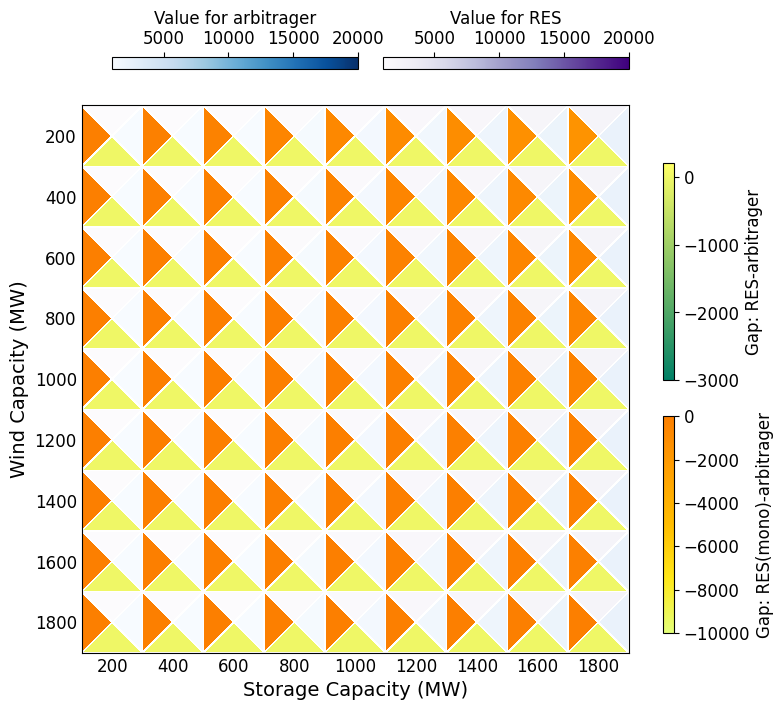

In [8]:
norms = [plt.Normalize(1000, 20000)] +[plt.Normalize(1000, 20000)] + [plt.Normalize(-3000,200)]+ [plt.Normalize(-10000,0)]


from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(8, 8))
imgs = [ax.tripcolor(t, np.ravel(val), cmap=cmap, norm=norm, ec='white')
        for t, val, cmap, norm in zip(triangul, values, cmaps, norms)]

ax.tick_params(length=0)
ax.set_xticks(range(M))
ax.set_xticklabels(df_piv['RES'].columns)
ax.set_yticks(range(N))
ax.set_yticklabels(df_piv.index)
ax.invert_yaxis()
ax.margins(x=0, y=0)
ax.set_aspect('equal', 'box')  # square cells

# axins = inset_axes(plt.gca(),width="100%",  height="5%",loc='lower right', borderpad=2.3)

cbar_3 = plt.colorbar(imgs[3], ax=ax, location='right', shrink=0.3, pad = -0.15, anchor = (0.0,0.1))
cbar_3.set_label('Gap: RES(mono)-arbitrager', fontsize = 12)
cbar_2 = plt.colorbar(imgs[2], ax=ax, location='right', shrink=0.3, anchor = (0.0,0.6))
cbar_2.set_label('Gap: RES-arbitrager', fontsize = 12)
cbar_2.ax.set_position(cbar_3.ax.get_position())
cbar_1 = plt.colorbar(imgs[1], ax=ax, location='top', shrink=0.45, pad = -0.15, anchor = (0.1,0.0))
cbar_1.set_label('Value for arbitrager', fontsize = 12)
cbar_0 = plt.colorbar(imgs[0], ax=ax, location='top', shrink=0.45, anchor = (1.0,0.0))
cbar_0.set_label('Value for RES', fontsize = 12)
cbar_0.ax.set_position(cbar_1.ax.get_position())
cbar_0.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_1.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_2.ax.tick_params(labelsize=12)  # Set the desired font size
cbar_3.ax.tick_params(labelsize=12)  # Set the desired font size
plt.xlabel('Storage Capacity (MW)', fontsize = 14)
plt.ylabel('Wind Capacity (MW)', fontsize = 14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(".\pics\heatmap_wind_winter.pdf")
plt.show()